In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Import the CSV Data as Pandas DataFrame

In [74]:
df=pd.read_csv('cardekho_imputated.csv',index_col=[0])

### Show Top 5 Records

In [77]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### Shape of the dataset

In [80]:
df.shape

(15411, 13)

### Summary of the dataset

In [83]:
df.describe().apply(lambda s:s.apply('{0:.5f}'.format))

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00000,15411.00000,15411.00000,15411.00000,15411.00000,15411.00000,15411.00000
mean,6.03634,55616.48063,19.70115,1486.05775,100.58825,5.32548,774971.11641
std,3.01329,51618.54842,4.17126,521.10670,42.97298,0.80763,894128.36326
min,0.00000,100.00000,4.00000,793.00000,38.40000,0.00000,40000.00000
25%,4.00000,30000.00000,17.00000,1197.00000,74.00000,5.00000,385000.00000
50%,6.00000,50000.00000,19.67000,1248.00000,88.50000,5.00000,556000.00000
75%,8.00000,70000.00000,22.70000,1582.00000,117.30000,5.00000,825000.00000
max,29.00000,3800000.00000,33.54000,6592.00000,626.00000,9.00000,39500000.00000


### Check Datatypes in the dataset

In [86]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


# 3. EXPLORING DATA

In [109]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype !='O' ]
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']
print(f"We have {len(numeric_feature)} numerical feature")
print(f"We have {len(categorical_feature)} categorical feature")

We have 7 numerical feature
We have 6 categorical feature


# Feature Information
- car_name: Car's Full name, which includes brand and specific model name.
- brand: Brand Name of the particular car.
- model: Exact model name of the car of a particular brand.
- seller_type: Which Type of seller is selling the used car
- fuel_type: Fuel used in the used car, which was put up on sale.
- transmission_type: Transmission used in the used car, which was put on sale.
- vehicle_age: The count of years since car was bought.
- mileage: It is the number of kilometer the car runs per litre.
- engine: It is the engine capacity in cc(cubic centimeters)
- max_power: Max power it produces in BHP.
- seats: Total number of seats in car.
- selling_price: The sale price which was put up on website.

In [92]:
df['seller_type'].value_counts(normalize=True)

seller_type
Dealer              0.618973
Individual          0.369801
Trustmark Dealer    0.011226
Name: proportion, dtype: float64

In [94]:
categorical_feature

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [96]:
for col in categorical_feature:
    print(df[col].value_counts(normalize=True)*100)
    print('--------------------------')

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
--------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini

#Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
Other Type of Analysis are

- Bivariate Analysis: The analysis of two variables.
- Multivariate Analysis: The analysis of two or more variables.

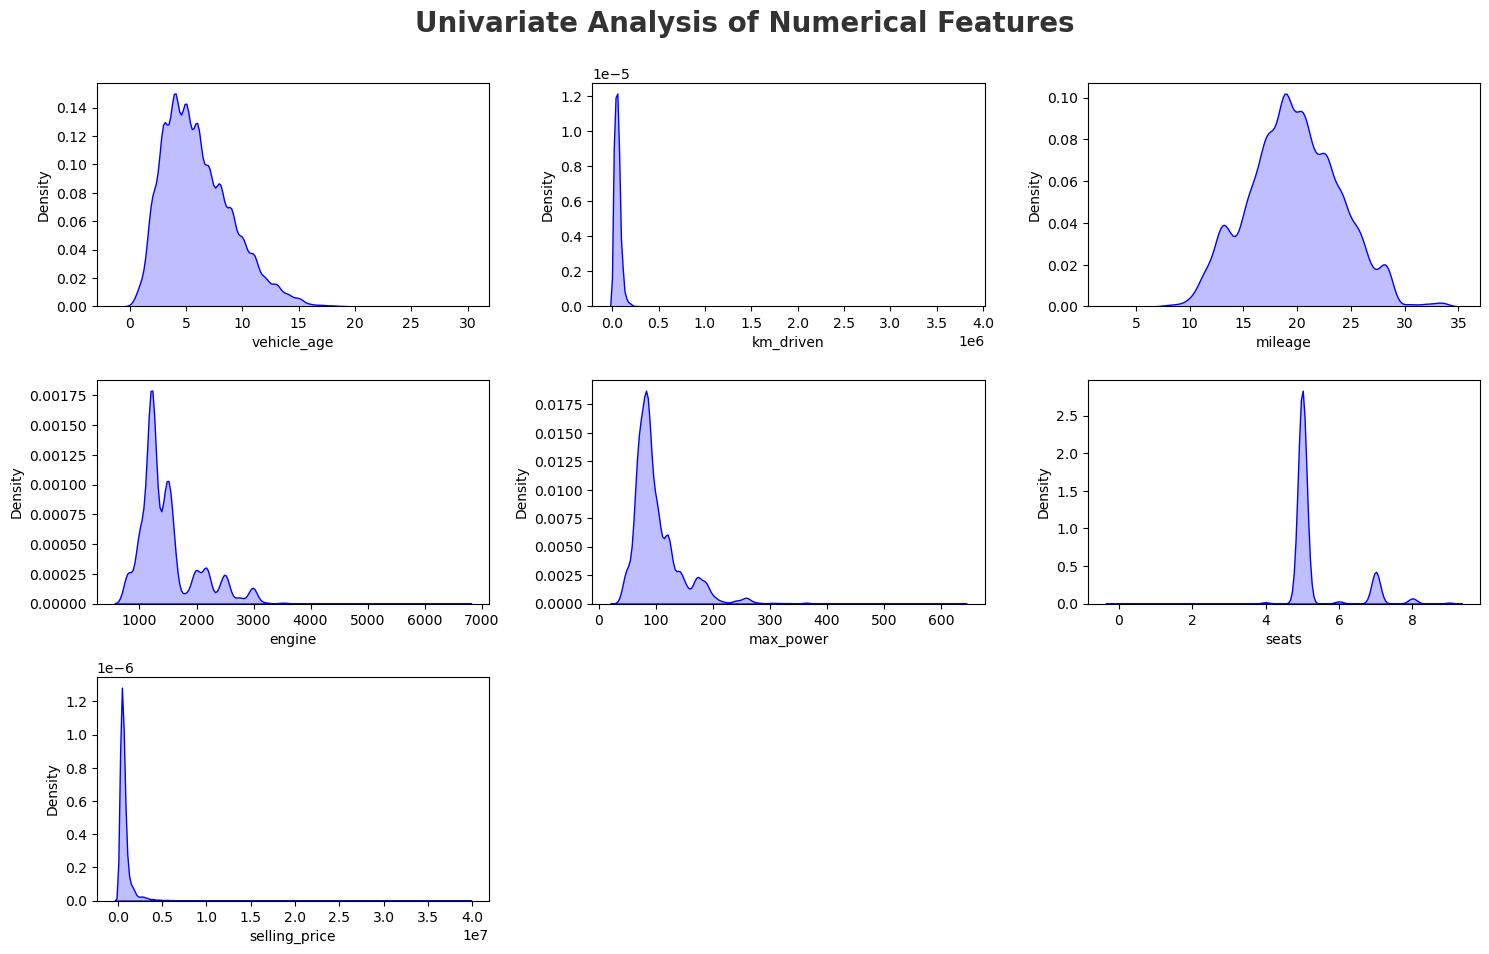

In [143]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_feature[i]],fill=True, color='b')
    #plt.xlabel(numeric_feature[i])
    plt.tight_layout()
plt.savefig('image')

<Axes: xlabel='selling_price', ylabel='Density'>

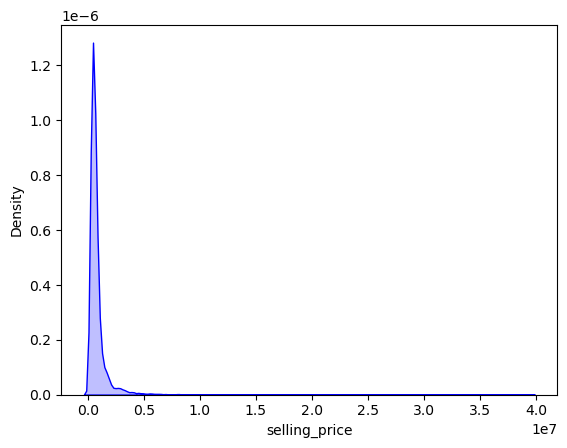

In [137]:
sns.kdeplot(x=df['selling_price'],fill=True, color='b')

## Report

- Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
- Outliers in km_driven, enginer, selling_price, and max power.

# Categorical  feature

In [148]:
categorical_feature

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

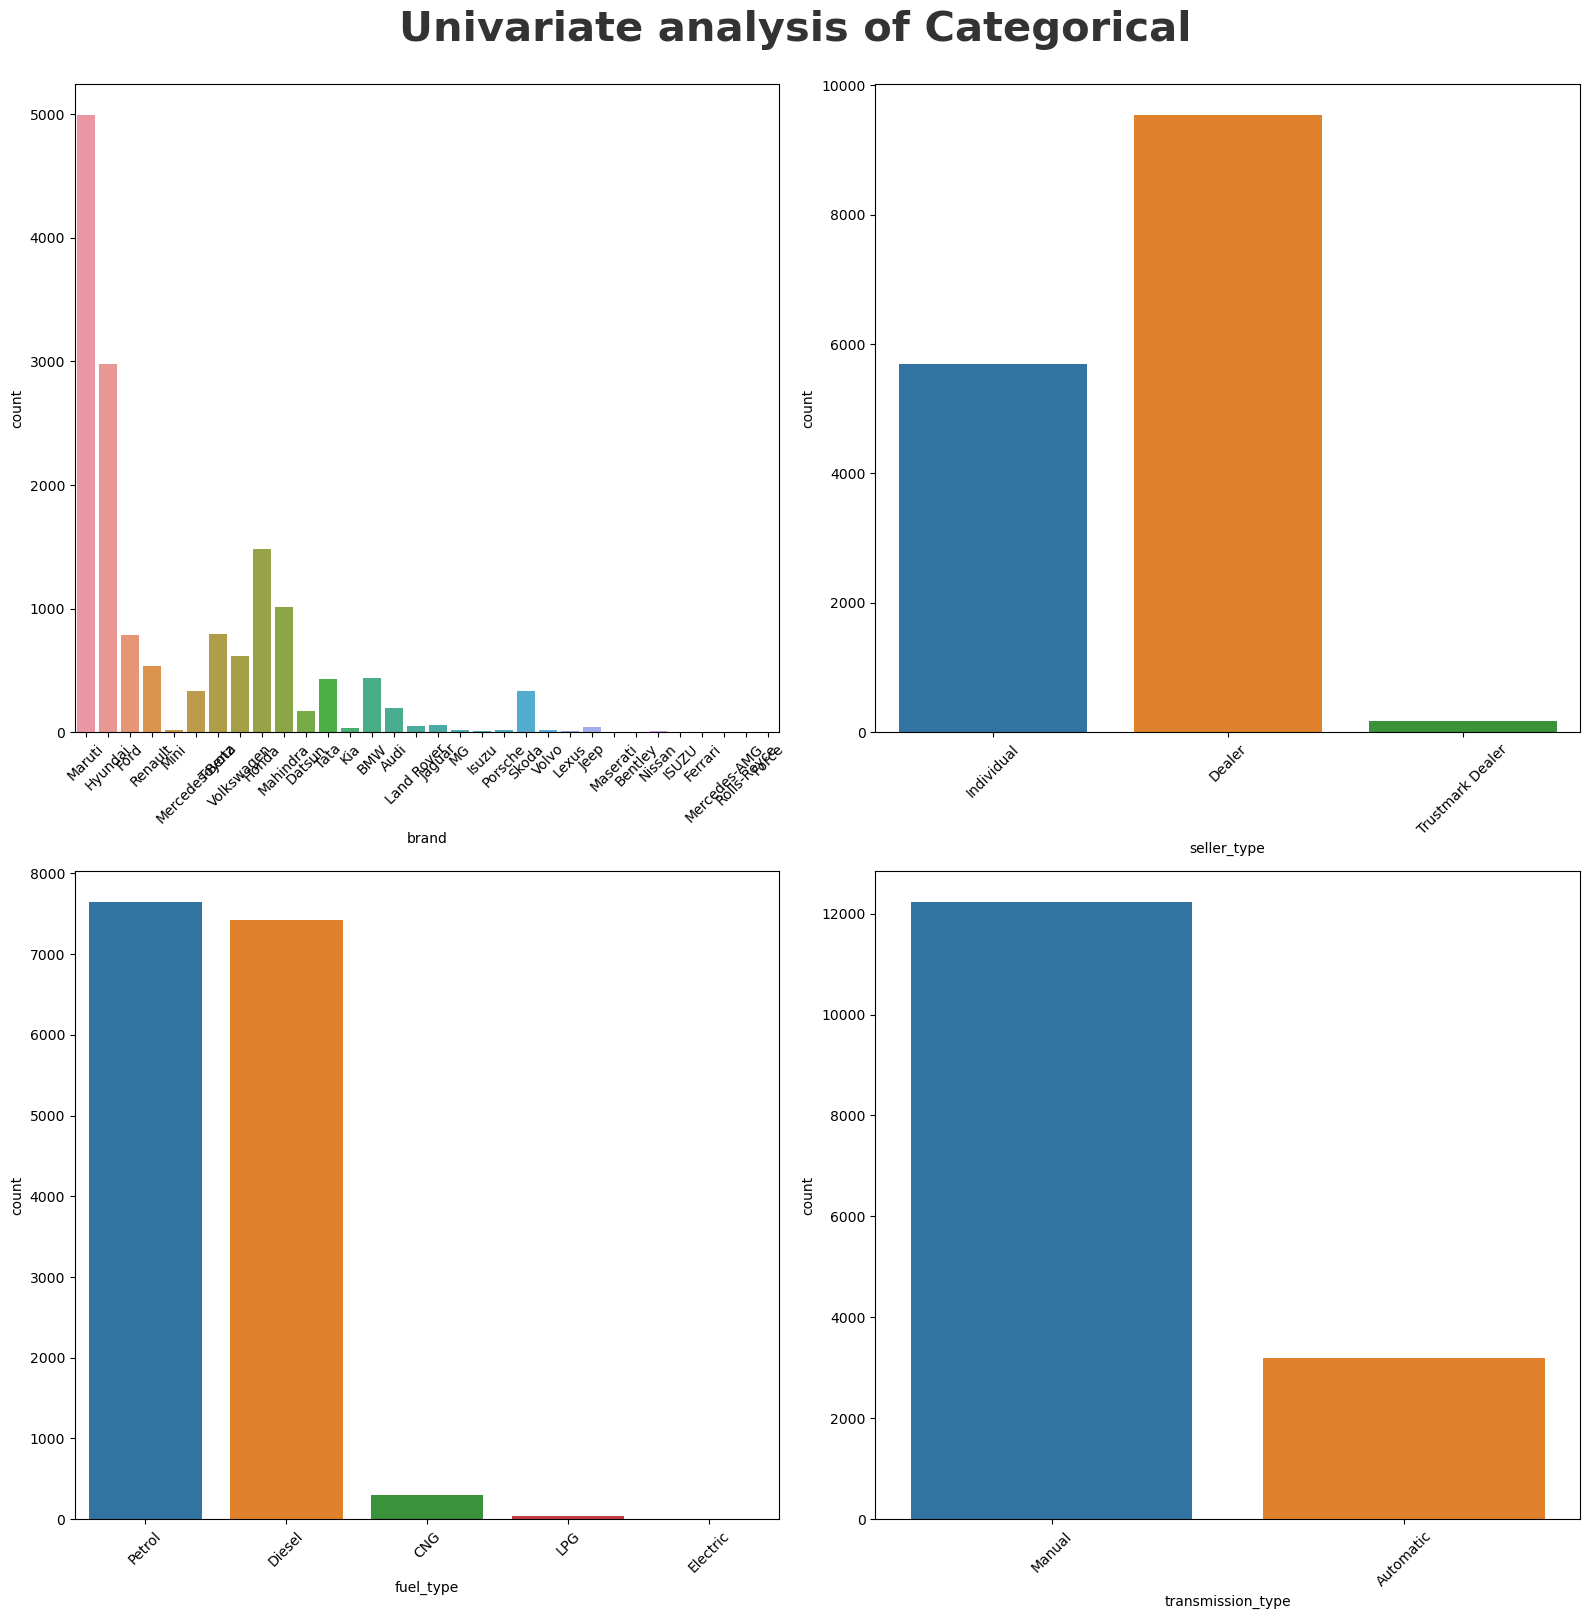

In [158]:
cat1=['brand', 'seller_type', 'fuel_type', 'transmission_type']
plt.figure(figsize=(16,16))
plt.suptitle('Univariate analysis of Categorical',y=1.0,alpha=0.8,fontweight='bold',fontsize=30)

for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.tight_layout()
    plt.xticks(rotation=45)

plt.savefig('catuni')

# Multivariate Analysis
- Multivariate analysis is the analysis of more than one variable.

In [179]:
#Check Multicollinearity in Numerical features
corrMat = df.corr(numeric_only=True) * 100
corrMat[corrMat >20]

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,100.000000,33.389144,NaN,NaN,NaN,NaN,NaN
km_driven,33.389144,100.000000,NaN,NaN,NaN,NaN,NaN
mileage,NaN,NaN,100.0,NaN,NaN,NaN,NaN
engine,NaN,NaN,NaN,100.000000,80.736842,55.12356,58.584367
max_power,NaN,NaN,NaN,80.736842,100.000000,NaN,75.023608
seats,NaN,NaN,NaN,55.123560,NaN,100.00000,NaN
selling_price,NaN,NaN,NaN,58.584367,75.023608,NaN,100.000000


<Axes: >

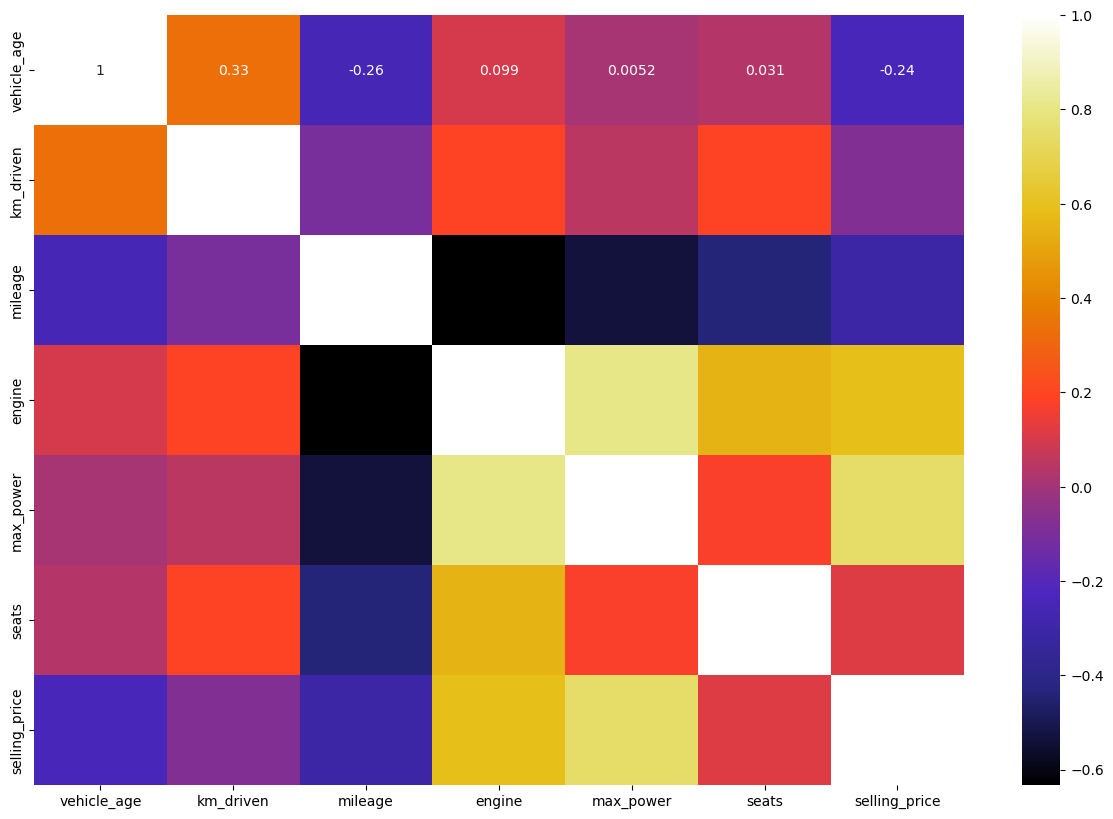

In [185]:
plt.figure(figsize=(15,10))
#px.density_heatmap(df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True),cmap='CMRmap',annot=True)

# Report

Our target column Selling Price has a weak positive correlation on engine and little strong correlation with max_power.